In [1]:
from osgeo import gdal,osr


In [2]:
import numpy as np
import pandas as pd
import struct
import matplotlib.pyplot as plt

In [3]:
#load data from file .tif
data_band = gdal.Open("HA_NOI_Class.tif",gdal.GA_ReadOnly)
data_band

D:\anaconda\envs\pygdal\Lib\site-packages\osgeo\gdal.py:287: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x00000168ECE36190> >

In [4]:
#Load the cube of data_band
class_band = data_band.GetRasterBand(1)
band_cube = []
for i in range(367):
    bandData = class_band.ReadRaster(xoff=0, yoff=i,
                                            xsize=class_band.XSize, ysize=1,
                                            buf_xsize=class_band.XSize, buf_ysize=1,
                                            buf_type=gdal.GDT_Float32)
    decimal_value =struct.unpack('f'*class_band.XSize, bandData)
    band_cube.append(decimal_value)

In [29]:
band_cube[0][1]

0.0

In [5]:

my_dict = {'1':[],'2':[],'3':[],'4':[],'5':[],'6':[],'7':[],'8':[],'9':[],'10':[],'11':[],'12':[]}

In [6]:
#classify labels 
for i in range(len(band_cube)):
    for j in range(len(band_cube[i])):
        tmp = int(band_cube[i][j])
        if(tmp!=0):
            my_dict[str(tmp)].append([i,j])


In [7]:
#get the information of each label
label,info = zip(*my_dict.items())
amount = [len(i) for i in info]
amount

[5446, 12102, 17698, 12097, 73, 1977, 210, 1098, 1, 3397, 21, 40]

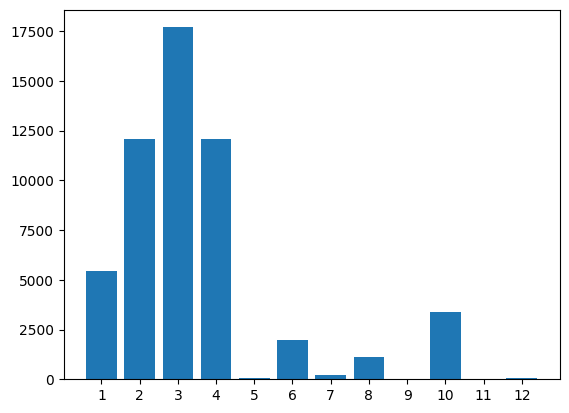

In [8]:
plt.bar(label,amount)
plt.show()

# Lấy mẫu dữ liệu

In [9]:
import numpy as np
import pandas as pd

In [31]:
np.random.seed(42)
#lưu thông tin của pixel trong file band_data.txt
with open("band_data.txt","w") as file:
    file.write("xPix,yPix,label\n")
    for i in range(len(amount)):
        if(amount[i] < 1000):
            my_dict[str(i+1)] = []
        else:
            my_arr = np.array(range(amount[i]))
            random_ele = np.random.choice(my_arr,size = 1000,replace = False)
            for j in random_ele:
                file.write(str(my_dict[str(i+1)][j][0])+","+str(my_dict[str(i+1)][j][1])+","+str(i+1)+"\n")


In [32]:
dataset = gdal.Open('HaNoiResample.tif',gdal.GA_ReadOnly)
print(type(dataset))

<class 'osgeo.gdal.Dataset'>


In [33]:
df = pd.read_csv("band_data.txt")

In [34]:
#the amount of bands
bands = [1,2,3,4,5,6,7]

#information of file .tif
geotransform = dataset.GetGeoTransform()


#width and height one pixel
width = geotransform[1]
height = geotransform[-1]

#the origin of coordinates
X0 = geotransform[0]
Y0 = geotransform[3]



In [35]:
data = df.values
len(data)

7000

In [37]:
#take the patterns of data
train_data = open("train_data.txt","w")
train_data.write("X,Y,B1,B2,B3,B4,B5,B6,B7,label,\n")
for row in data:
    xCoor = row[1]*248.861287068994415+529856.162601926596835+50
    yCoor = row[0]*-248.861287068994329+2365139.414989041630179-50
    train_data.write(str(xCoor)+","+str(yCoor)+",")
    tmp = ""
    for band in bands:
        band_data = dataset.GetRasterBand(band)
        scanline = band_data.ReadRaster(xoff=int(row[1]), yoff=int(row[0]),
                            xsize=1, ysize=1,
                            buf_xsize=1, buf_ysize=1,
                            buf_type=gdal.GDT_Float32)
        decimal_data = struct.unpack('f' , scanline)[0]
        tmp+= str(decimal_data)+","
    tmp+= str(int(row[2]))+","
    train_data.write(tmp+"\n")